# EasyEdit Example with **IKE**
> Tutorial author: Bozhong Tian(<tbozhong@zju.edu.cn>)
> 
In this tutorial, we use `IKE` to edit `BLIP2OPT` and `MiniGPT-4` model. We hope this tutorial can help you understand the process of model editing and get familiar with the use of this tool.

This tutorial uses `Python3.9`.

# Model Editing
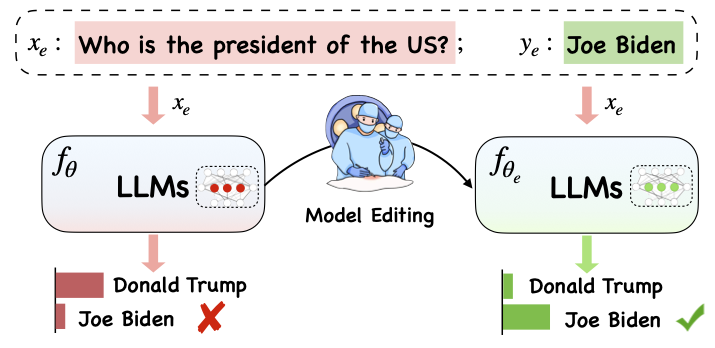

Deployed models may still make unpredictable errors. For example, Large Language Models (LLMs) notoriously *hallucinate*, *perpetuate bias*, and *factually decay*, so we should be able to adjust specific behaviors of pre-trained models.

**Model editing** aims to adjust an initial base model's $(f_\theta)$ behavior on the particular edit descriptor $[x_e, y_e]$, such as:
- $x_e$: "Who is the president of the US?
- $y_e$: "Joe Biden."

efficiently without influencing the model behavior on unrelated samples. The ultimate goal is to create an edited model$(f_\theta’)$.

# Method: **IKE**

Paper: [Can We Edit Factual Knowledge by In-Context Learning?](https://arxiv.org/abs/2305.12740)

**IKE** (In-context Knowledge Editing), is a way of editing factual knowledge in large language models **without modifying their parameters**, but by **providing different types of natural language demonstrations** as part of the input.  
It can achieve competitive knowledge editing performance **with less computation overhead and side effects**, as well as better scalability and interpretability.

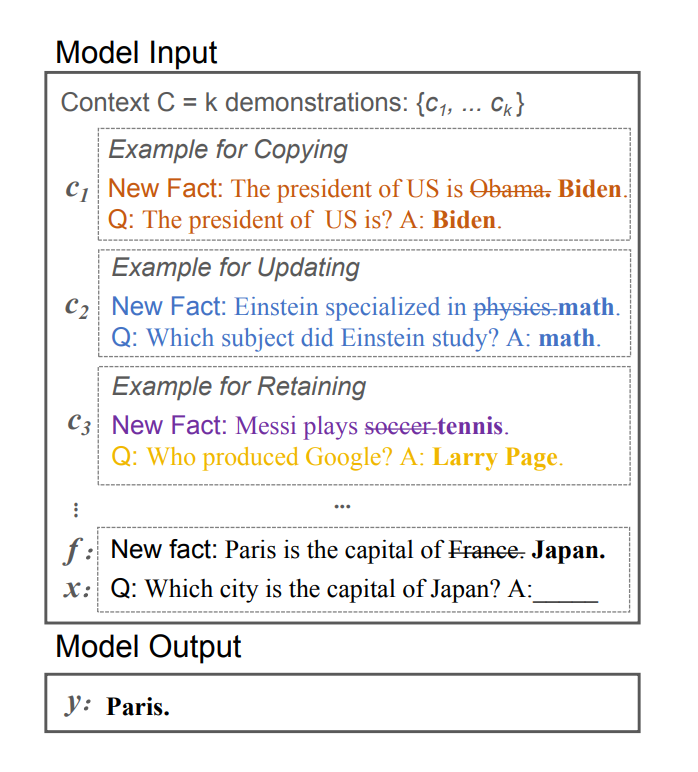

## Prepare the runtime environment

In [ ]:
## Clone Repo
!git clone https://github.com/zjunlp/EasyEdit
%cd EasyEdit
!ls

In [ ]:
!apt-get install python3.9

In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!sudo update-alternatives --config python3

In [ ]:
!apt-get install python3-pip
!pip install -r requirements.txt

In [ ]:
!pip list## Config Method Parameters

## Config Method Parameters


```python
# For IKE hparams:
alg_name: "IKE"
model_name: "blip2" or "minigpt4"
sentence_model_name: "all-MiniLM-L6-v2"
device: 0
results_dir: "./results"

k: 32
```



In [ ]:
!pip install matplotlib
!pip install sentence_transformers

## Import modules & Run

### Prepare the inputs

In [1]:
## Edit for CaptionDataset
prompts = [
      "a photo of",
      "a photo of"
]
targets = [
    "A couple trays of cookies on a counter.",
    "a couple of people that are cutting a piece of cake",
]
image = [
    "val2014/COCO_val2014_000000575018.jpg",
    "val2014/COCO_val2014_000000048332.jpg"
]
rephrase_prompts = [
    "a photograph of",
    "give a detailed description of the picture,"
]
rephrase_image = [
    "val2014_image_rephrase/COCO_val2014_000000575018.png",
    "val2014_image_rephrase/COCO_val2014_000000048332.png"
]
locality_inputs = {
    'text': {
        'prompt': ["nq question: what purpose did seasonal monsoon winds have on trade", "nq question: what purpose did seasonal monsoon winds have on trade",],
        'ground_truth': ["enabled European empire expansion into the Americas and trade routes to become established across the Atlantic and Pacific oceans", "enabled European empire expansion into the Americas and trade routes to become established across the Atlantic and Pacific oceans"]
    },
    'vision': {
        'prompt': ["What sport can you use this for?", "What sport can you use this for?"],
        'ground_truth': ["riding", "riding",],
        'image': ["val2014/COCO_val2014_000000297147.jpg", "val2014/COCO_val2014_000000297147.jpg"],
    }
}

In [8]:
## Edit for VQADataset
prompts = [
    "How many tennis balls are in the picture?",
    "What is the red food?"
]
targets = [
    "2",
    "tomatoes",
]
image = [
    "val2014/COCO_val2014_000000451435.jpg",
    "val2014/COCO_val2014_000000189446.jpg"
]
rephrase_prompts = [
    "What is the number of tennis balls depicted in the image?",
    "What is the name of the food that is red in color?"
]
rephrase_image = [
    "val2014_image_rephrase/451435003_COCO_val2014_000000451435.png",
    "val2014_image_rephrase/189446003_COCO_val2014_000000189446.png"
]
locality_inputs = {
    'text': {
        'prompt': ["nq question: what purpose did seasonal monsoon winds have on trade", "nq question: what purpose did seasonal monsoon winds have on trade",],
        'ground_truth': ["enabled European empire expansion into the Americas and trade routes to become established across the Atlantic and Pacific oceans", "enabled European empire expansion into the Americas and trade routes to become established across the Atlantic and Pacific oceans"]
    },
    'vision': {
        'prompt': ["What sport can you use this for?", "What sport can you use this for?"],
        'ground_truth': ["riding", "riding",],
        'image': ["val2014/COCO_val2014_000000297147.jpg", "val2014/COCO_val2014_000000297147.jpg"],
    }
}

### For MiniGPT-4 Model

In [ ]:
from easyeditor import BaseEditor, MultimodalTrainer, MultimodalEditor
from easyeditor import CaptionDataset, VQADataset
from easyeditor import MENDMultimodalTrainingHparams, SERACMultimodalTrainingHparams, IKEMultimodalHyperParams, MENDMultimodalHparams \
    , SERACMultimodalHparams
    
hparams = MENDMultimodalHparams.from_hparams('hparams/MEND/minigpt4.yaml')
editor = MultimodalEditor.from_hparams(hparams)
metrics, edited_model, _, post_logits, pre_logits = editor.edit_demo(
    prompts=prompts,
    targets=targets,
    image=image,
    rephrase_prompts=rephrase_prompts,
    rephrase_image=rephrase_image,
    locality_inputs=locality_inputs,
    keep_original_weight=True        
)

2023-10-17 23:27:18,116 - easyeditor.editors.multimodal_editor - INFO - Instantiating model
2023-10-17 23:27:18,116 - easyeditor.editors.multimodal_editor - INFO - Instantiating model
10/17/2023 23:27:18 - INFO - easyeditor.editors.multimodal_editor -   Instantiating model


Loading VIT
Position interpolate from 16x16 to 26x26
freeze vision encoder
Loading VIT Done
Loading Q-Former


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertLMHeadModel: ['bert.embeddings.token_type_embeddings.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['bert.encoder.layer.9.output_query.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.6.output_query.dense.weight', 'bert.encoder.layer.8.crossatten

load checkpoint from hugging_cache/blip2_pretrained_flant5xxl.pth
freeze Qformer


normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading Q-Former Done
Loading LLAMA


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Loading LLAMA Done


2023-10-17 23:30:29,946 - easyeditor.editors.multimodal_editor - INFO - Execution 0 editing took 0.9284358024597168
2023-10-17 23:30:29,946 - easyeditor.editors.multimodal_editor - INFO - Execution 0 editing took 0.9284358024597168
10/17/2023 23:30:29 - INFO - easyeditor.editors.multimodal_editor -   Execution 0 editing took 0.9284358024597168
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
2023-10-17 23:30:31,127 - easyeditor.editors.multimodal_editor - INFO - Evaluation took 1.178135871887207
2023-10-17 23:30:31,127 - easyeditor.editors.multimodal_editor - INFO - Evaluation took 1.178135871887207
10/17/2023 23:30:31 - INFO - easyeditor.editors.multimodal_editor -   Evaluation took 1.178135871887207
2023-10-17 23:30:31,134 - easyeditor.editors.multimodal_editor - INFO - 0 editing: How many tennis balls are in the picture? -> 2  
 {'case_id': 0, 'time': 0.9284358024597168, 'post': {'rewrite_acc

In [10]:
print(editor.tok.decode(post_logits[0].argmax(-1).tolist()))
print(editor.tok.decode(pre_logits[0].argmax(-1).tolist()))

tomatoes
ato?


### For BLIP2OPT Model

In [ ]:
from easyeditor import BaseEditor, MultimodalTrainer, MultimodalEditor
from easyeditor import CaptionDataset, VQADataset
from easyeditor import MENDMultimodalTrainingHparams, SERACMultimodalTrainingHparams, IKEMultimodalHyperParams, MENDMultimodalHparams \
    , SERACMultimodalHparams
    
hparams = MENDMultimodalHparams.from_hparams('hparams/MEND/blip2.yaml')
editor = MultimodalEditor.from_hparams(hparams)
metrics, edited_model, _, post_logits, pre_logits = editor.edit_demo(
    prompts=prompts,
    targets=targets,
    image=image,
    rephrase_prompts=rephrase_prompts,
    rephrase_image=rephrase_image,
    locality_inputs=locality_inputs,
    keep_original_weight=True        
)